In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_of_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

matplotlib settings set


matplotlib settings set
This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in photometric prior mode (autocalibration)

In [3]:
magnitude_columns = [
                    ('nnmag_grz', 'auto'),
                    ('nnmag_grzw1', 'auto'),
                    ('nnmag_grzw1w2', 'auto'),
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 3.0,
'store_mag_hists': True,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.656740,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.689910,1.969860e-12,NaN
2,2,b'SRGe J110537.6+585120',166.406669,58.855424,0.668180,1.505411e-12,NaN
3,3,b'SRGe J102349.9+563347',155.958041,56.563186,0.652214,1.001123e-12,NaN
4,4,b'SRGe J105057.2+593215',162.738144,59.537414,0.656779,9.137326e-13,NaN
...,...,...,...,...,...,...,...
9210,9210,b'SRGe J102315.1+561957',155.813071,56.332561,3.950350,1.637604e-15,NaN
9211,9211,b'SRGe J102332.5+562524',155.885436,56.423270,3.220603,1.608667e-15,NaN
9212,9212,b'SRGe J102235.0+561919',155.645874,56.321872,3.025501,1.595806e-15,NaN
9213,9213,b'SRGe J102223.5+562357',155.597875,56.399058,3.296691,1.532857e-15,NaN


In [4]:
ero_ctps_pandas

,ID,desi_id_true_ctp
0,b'SRGe J103105.9+573747',b'9011_610714_1440'
1,b'SRGe J103123.8+574309',b'9011_610714_2092'
2,b'SRGe J103130.8+573932',b'9011_610714_2412'
3,b'SRGe J103137.0+573159',b'9011_609939_1093'
4,b'SRGe J103143.5+573156',b'9011_609939_1343'
...,...,...
53,b'SRGe J105323.6+573829',b'hostless'
54,b'SRGe J105336.4+573800',b'hostless'
55,b'SRGe J105506.3+572958',b'hostless'
56,b'SRGe J105640.4+573203',b'hostless'


    adding angular separation columns
matching: 145069 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:03<00:00, 2752.55it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogram of column "DESI_nnmag_grz": 341 secure matches, 5661 insecure matches and 564355 secure non-matches of 2418574 total entries (564696 valid)
magnitude histogram stored to "DESI_nnmag_grz_fit.txt".


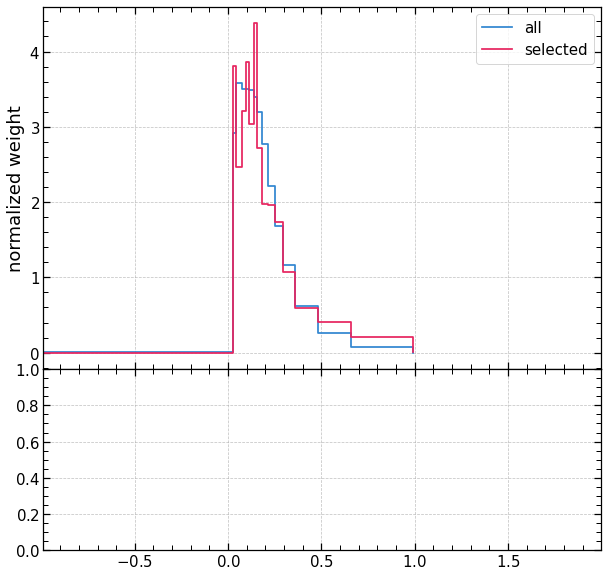

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:nnmag_grzw1" ...
magnitude histogram of column "DESI_nnmag_grzw1": 302 secure matches, 5661 insecure matches and 463991 secure non-matches of 2418574 total entries (464293 valid)
magnitude histogram stored to "DESI_nnmag_grzw1_fit.txt".


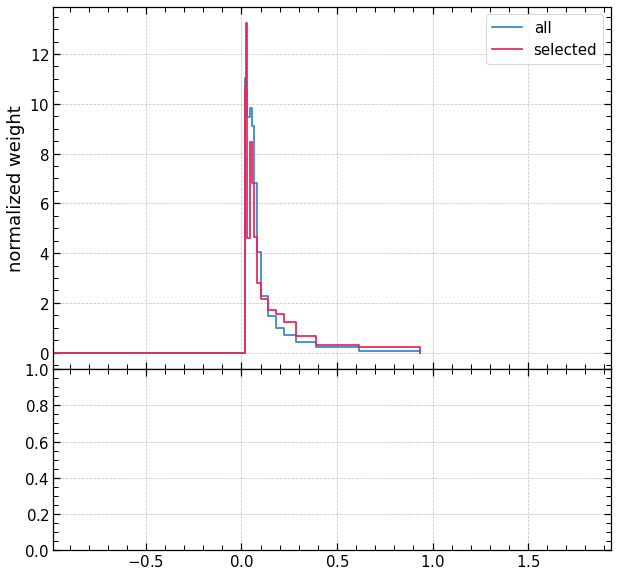

Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogram of column "DESI_nnmag_grzw1w2": 4285 secure matches, 5661 insecure matches and 719240 secure non-matches of 2418574 total entries (723525 valid)
magnitude histogram stored to "DESI_nnmag_grzw1w2_fit.txt".


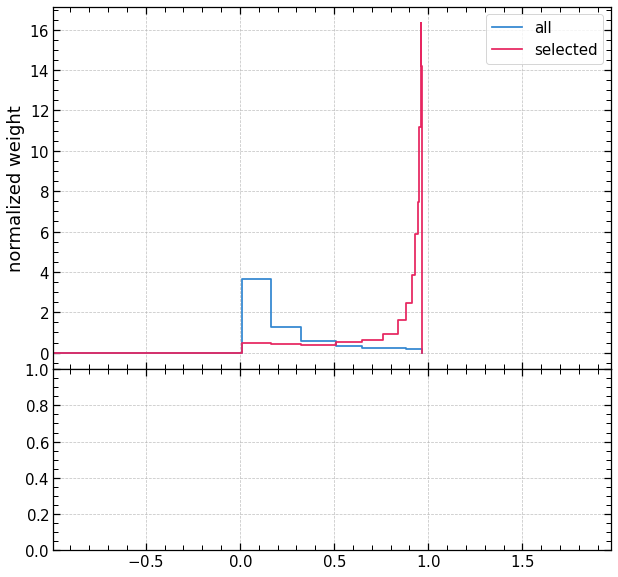


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [5]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


In [6]:

# nway_res_ero_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)


In [7]:
os.system('rm DESI*_fit.txt')

0

In [8]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])

 Completeness = 94% 
 Purity = 94% 
 prob_has_match optimal cutoff =  0.46 
 Fraction of sources with prob_has_match > 0.46 = 83%


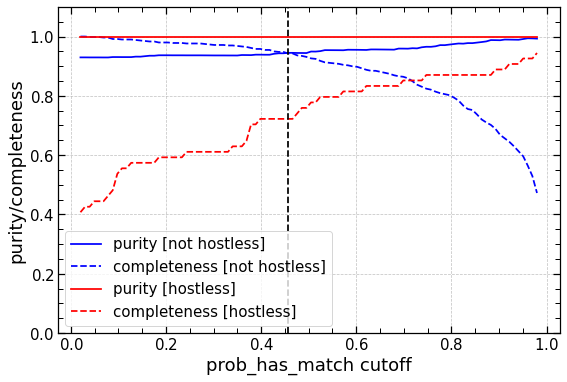

 NOT HOSTLESS 
assigned NOT HOSTLESS: 563
assigned NOT HOSTLESS with correct match: 532
total: 597
purity [assigned NOT HOSTLESS correctly / all NOT HOSTLESS]: 0.9449378330373002
completeness [all NOT HOSTLESS / total NOT HOSTLESS]: 0.9430485762144054
 HOSTLESS 
assigned HOSTLESS: 39
assigned HOSTLESS correctly: 39
total HOSTLESS: 54
purity [assigned HOSTLESS correctly / all assigned HOSTLESS]: 1.0
completeness [all HOSTLESS assigned / total HOSTLESS]: 0.7222222222222222


In [9]:
assess_goodnes_of_cross_match(nway_res_ero);